In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv('Student_Performance.csv')
dataset.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
dataset.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [6]:
dataset.dtypes

Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

In [10]:
numerical_values=dataset.dtypes=='int64'
num_=list(numerical_values[numerical_values].index)
print(len(num_))

float_=dataset.dtypes=='float64'
float_columns=list(float_[float_].index)
print(len(float_columns))


cat_=dataset.dtypes=='object'
cat_columns=list(cat_[cat_].index)
print(len(cat_columns))

4
1
1


In [12]:
heatmap_values=dataset.drop(['Extracurricular Activities'], axis=1)

heatmap_values.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


<Axes: >

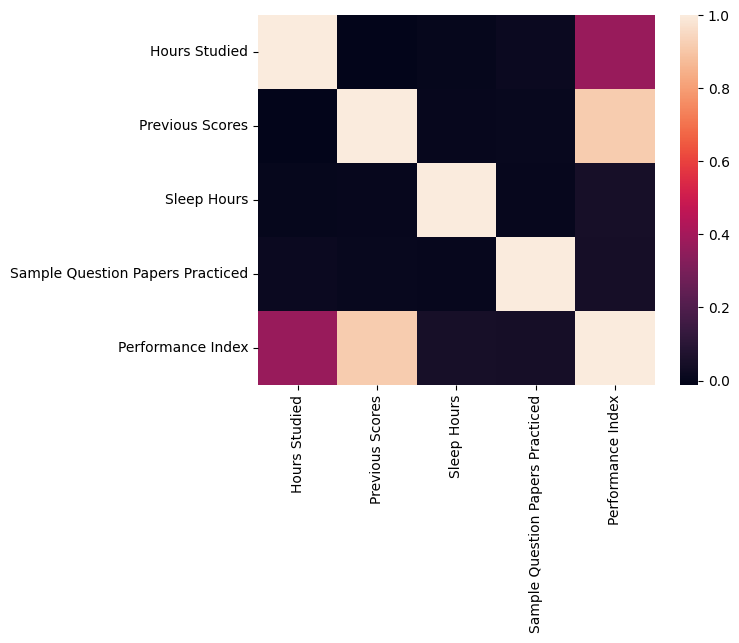

In [13]:
sns.heatmap(heatmap_values.corr())

<Axes: xlabel='Performance Index', ylabel='Count'>

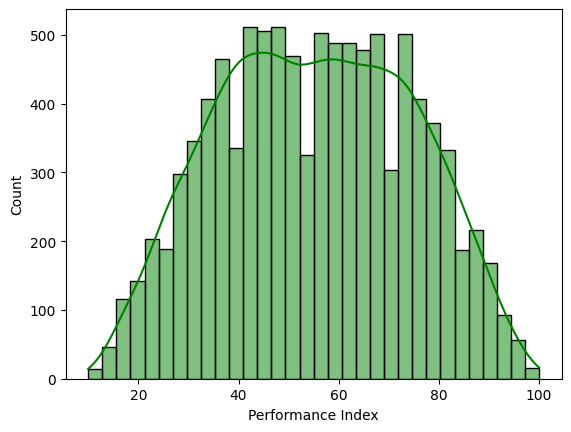

In [16]:
sns.histplot(dataset['Performance Index'], kde=True, color='green')

In [18]:
null_values=dataset.isnull().sum()
null_values

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [29]:
#One Hot Encoding



dataset=pd.get_dummies(dataset)




In [30]:
dataset.columns

Index(['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Performance Index',
       'Extracurricular Activities_No', 'Extracurricular Activities_Yes'],
      dtype='object')

In [32]:
from sklearn.model_selection import train_test_split

X=dataset[['Hours Studied', 'Previous Scores', 'Sleep Hours',
       'Sample Question Papers Practiced', 'Extracurricular Activities_No', 'Extracurricular Activities_Yes']]

Y=dataset['Performance Index']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [33]:
X_train.shape

(8000, 6)

In [34]:
Y_train.shape

(8000,)

In [35]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

model.fit(X_train, Y_train)

LinearRegression()

In [38]:
new_values=[[4,82,4,2,0,1]]

preds=model.predict(new_values)

preds[0]


c:\Users\shash\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


63.78106731641697

In [40]:
from sklearn.metrics import mean_squared_error, r2_score

Y_pred=model.predict(X_test)
mse=mean_squared_error(Y_pred, Y_test)
r2=r2_score(Y_pred, Y_test)

print("MSE: ", mse)
print("R2: ", r2)



MSE:  4.0826283985218526
R2:  0.9887203279837656


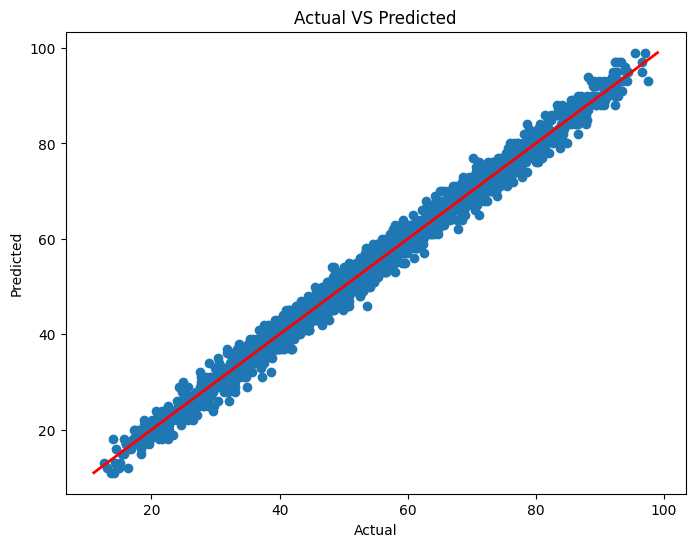

In [41]:
plt.figure(figsize=(8,6))
plt.title("Actual VS Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.scatter(Y_pred, Y_test)
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], color='red', lw=2)
plt.show()